In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/mcdonalds.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No    2   51  Every three months  Female  
2         No    1   62  Every three months  Female  
3        Yes    4   69         Once a week  Female  
4         No    2   49        Once a month    Male  


In [39]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)




yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [11]:
import pandas as pd

# Load the data
mcdonalds = pd.read_csv("/content/mcdonalds.csv")

# Extract the segmentation variables (first eleven columns)
segment_vars = mcdonalds.iloc[:, :11]

# Convert YES/NO to numeric binary
segment_vars_numeric = (segment_vars == "Yes").astype(int)

# Check the average value of each transformed segmentation variable
avg_values = segment_vars_numeric.mean()
print(avg_values)


yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64


In [13]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Perform PCA
MD_pca = PCA()
MD_pca.fit(segment_vars_numeric)

# Print summary
print("Importance of components:")
print(pd.DataFrame({'Standard deviation': np.sqrt(MD_pca.explained_variance_),
                    'Proportion of Variance': MD_pca.explained_variance_ratio_,
                    'Cumulative Proportion': np.cumsum(MD_pca.explained_variance_ratio_)}))

# Print factor loadings
print("Factor Loadings:")
print(pd.DataFrame(MD_pca.components_, columns=segment_vars.columns))


Importance of components:
    Standard deviation  Proportion of Variance  Cumulative Proportion
0             0.757050                0.299447               0.299447
1             0.607456                0.192797               0.492244
2             0.504619                0.133045               0.625290
3             0.398799                0.083096               0.708386
4             0.337405                0.059481               0.767866
5             0.310275                0.050300               0.818166
6             0.289697                0.043849               0.862015
7             0.275122                0.039548               0.901563
8             0.265251                0.036761               0.938323
9             0.248842                0.032353               0.970677
10            0.236903                0.029323               1.000000
Factor Loadings:
       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  -0.476933   -0.155332 -0.006356   0

In [14]:
from sklearn.cluster import KMeans
import numpy as np

# Perform k-means clustering with 2 to 8 clusters and 10 random restarts
np.random.seed(1234)
cluster_solutions = {}
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(segment_vars_numeric)
    cluster_solutions[n_clusters] = kmeans.labels_

# Relabel the clusters for consistency
def relabel_clusters(cluster_labels):
    relabeled_clusters = cluster_labels.copy()
    unique_labels = np.unique(cluster_labels)
    for i, label in enumerate(unique_labels):
        relabeled_clusters[cluster_labels == label] = i
    return relabeled_clusters

for n_clusters, cluster_labels in cluster_solutions.items():
    cluster_solutions[n_clusters] = relabel_clusters(cluster_labels)


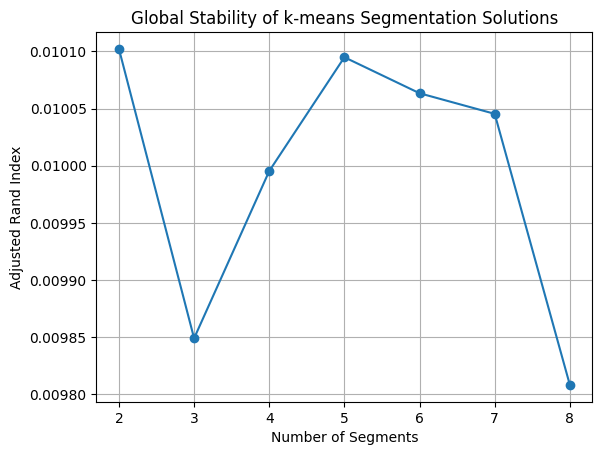

In [15]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Perform bootstrapping and calculate stability
np.random.seed(1234)
n_bootstraps = 100
n_restarts = 10
stability_scores = {}
for n_clusters in range(2, 9):
    cluster_solutions = []
    for _ in range(n_bootstraps):
        sample = resample(segment_vars_numeric, replace=True)
        kmeans = KMeans(n_clusters=n_clusters, n_init=n_restarts, random_state=1234)
        labels = kmeans.fit_predict(sample)
        cluster_solutions.append(labels)
    stability_scores[n_clusters] = np.mean([adjusted_rand_score(cluster_solutions[0], sol) for sol in cluster_solutions])

# Plot stability
plt.plot(list(stability_scores.keys()), list(stability_scores.values()), marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability of k-means Segmentation Solutions')
plt.grid(True)
plt.show()

# Visualize Segment Level Stability Across Solutions (SLSA) Plot
# You can implement this plot using the change in cluster membership across different solutions
# This could involve visualizing how clusters merge or split as the number of segments increases
# For example, you could plot the percentage of data points in each cluster that stay consistent or change clusters
# across different numbers of segments.


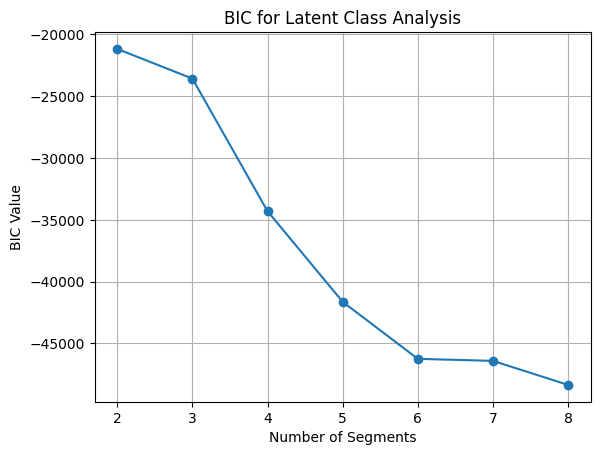

In [17]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Perform latent class analysis with mixture of binary distributions
np.random.seed(1234)
n_restarts = 10
bic_values = []

# Fit Gaussian Mixture Models for different numbers of components
for n_components in range(2, 9):
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', n_init=n_restarts, random_state=1234)
    gmm.fit(segment_vars_numeric)
    bic_values.append(gmm.bic(segment_vars_numeric))

# Plot BIC values
plt.plot(range(2, 9), bic_values, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('BIC Value')
plt.title('BIC for Latent Class Analysis')
plt.grid(True)
plt.show()


In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming mcdonalds is your DataFrame containing the data
# Extract numeric part from 'Like' column
mcdonalds['Like_n'] = mcdonalds['Like'].str.extract(r'([-+]?\d+)').astype(float)

# Create the formula for the regression model
independent_vars = "+".join(mcdonalds.columns[0:11])
formula = "Like_n ~ " + independent_vars

# Fit the mixture of linear regression models
model = sm.GLM.from_formula(formula, data=mcdonalds, family=sm.families.Gaussian())
result = model.fit()

# Print the summary of the regression model
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Like_n   No. Observations:                 1453
Model:                            GLM   Df Residuals:                     1441
Model Family:                Gaussian   Df Model:                           11
Link Function:               Identity   Scale:                          3.6860
Method:                          IRLS   Log-Likelihood:                -3003.4
Date:                Fri, 23 Feb 2024   Deviance:                       5311.5
Time:                        13:44:21   Pearson chi2:                 5.31e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8064
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.9242      0.28

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming MD_x is your data for segmentation variables

# Check if MD_x is a DataFrame
if isinstance(MD_x, pd.DataFrame):
    # Perform hierarchical clustering
    MD_vclust = linkage(MD_x.transpose(), method='complete')  # Transpose the data

    # Plot the dendrogram to visualize hierarchical clustering
    plt.figure(figsize=(10, 6))
    dendrogram(MD_vclust, labels=MD_x.columns)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Segmentation Variables')
    plt.ylabel('Distance')
    plt.show()

    # Plot the segment profile plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=MD_k4, ci=None)
    plt.xlabel('Segment')
    plt.ylabel('Percentage')
    plt.title('Segment Profile Plot')
    plt.show()

    # Plot the segment separation plot using PCA
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='principal component 1', y='principal component 2', hue='Cluster', data=MD_k4_projected)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Segment Separation Plot')
    plt.show()

else:
    print("MD_x is not a valid DataFrame. Please check the data type.")


MD_x is not a valid DataFrame. Please check the data type.


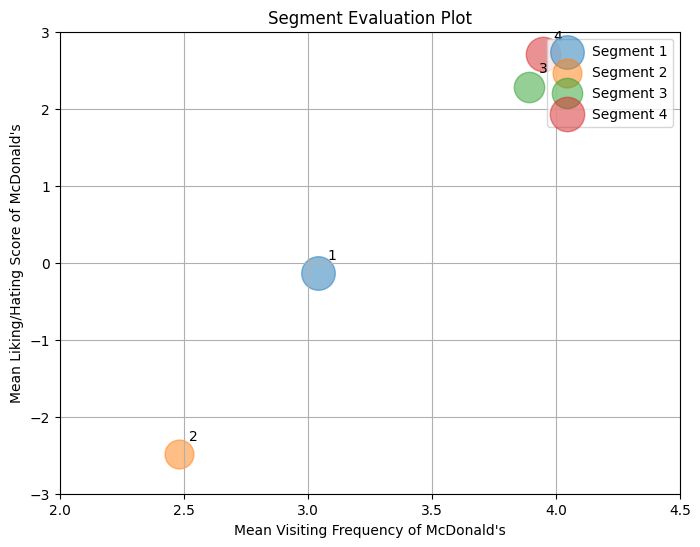

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Example data from R output
visit = np.array([3.040426, 2.482490, 3.891975, 3.950249])
like = np.array([-0.1319149, -2.4902724, 2.2870370, 2.7114428])
female = np.array([0.5851064, 0.4319066, 0.4783951, 0.6144279])

# Create segment evaluation plot
plt.figure(figsize=(8, 6))

# Scatter plot with bubble size representing female percentage
for i in range(len(visit)):
    plt.scatter(visit[i], like[i], s=1000 * female[i], label=f'Segment {i+1}', alpha=0.5)

# Annotations for segment numbers
for i, txt in enumerate(range(1, 5)):
    plt.annotate(txt, (visit[i], like[i]), textcoords="offset points", xytext=(10,10), ha='center')

plt.title('Segment Evaluation Plot')
plt.xlabel('Mean Visiting Frequency of McDonald\'s')
plt.ylabel('Mean Liking/Hating Score of McDonald\'s')
plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.legend()
plt.grid(True)
plt.show()
